In [1]:
from datasets import load_dataset

ds = load_dataset("keremberke/football-object-detection")

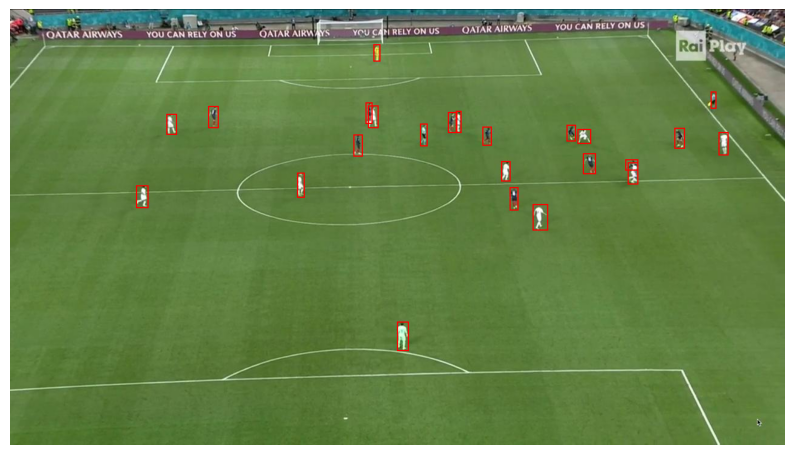

In [2]:
import matplotlib.pyplot as plt
from PIL import ImageDraw
from random import randrange

training_size = len(ds['train']['image'])
example_id = randrange(training_size)

# Example image load
image = ds['train']['image'][example_id]
objects = ds['train']['objects'][example_id]

# Colors dictionnary
category_colors = {
    0: "red",
    1: "blue",
    2: "green",
    3: "yellow",
    4: "purple",
    5: "orange",
}

# 'Draw' object creation to draw onto the image
draw = ImageDraw.Draw(image)

# Bounding box drawing, category based coloring
for bbox, category in zip(objects['bbox'], objects['category']):
    x_min, y_min, width, height = bbox
    x_max = x_min + width
    y_max = y_min + height
    color = category_colors.get(category, "white")  # Couleur par défaut si la catégorie n'est pas dans le dictionnaire
    draw.rectangle([(x_min, y_min), (x_max, y_max)], outline=color, width=2)

# Image display with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

### Convertion to YOLO yaml format

In [3]:
import os

for split in ['train', 'test', 'validation']:
    if split in ds:
        os.makedirs(f'../datasets/yolo_football/images/{split}', exist_ok=True)
        os.makedirs(f'../datasets/yolo_football/labels/{split}', exist_ok=True)
        for idx, example in enumerate(ds[split]):
            
            # Image saving
            image_path = f'../datasets/yolo_football/images/{split}/{idx}.jpg'
            example['image'].save(image_path)
            width, height = example['image'].size
            
            # Annotation file creation
            label_path = f'../datasets/yolo_football/labels/{split}/{idx}.txt'
            with open(label_path, 'w') as f:
                for bbox, category in zip(example['objects']['bbox'], example['objects']['category']):
                    # YOLO format requires normalized coordinates
                    x_min, y_min, bbox_width, bbox_height = bbox
                    x_center = (x_min + bbox_width / 2) / width
                    y_center = (y_min + bbox_height / 2) / height
                    normalized_width = bbox_width / width
                    normalized_height = bbox_height / height

                    # YOLO format annotation writting
                    f.write(f"{category} {x_center} {y_center} {normalized_width} {normalized_height}\n")


In [4]:
import os
import yaml

def create_yaml_file(output_path, train_path, val_path, test_path, class_names):
    """
    Crée un fichier .yaml pour un dataset YOLO.

    :param output_path: Chemin où le fichier .yaml sera sauvegardé.
    :param train_path: Chemin vers le dossier contenant les images d'entraînement.
    :param val_path: Chemin vers le dossier contenant les images de validation.
    :param test_path: Chemin vers le dossier contenant les images de test.
    :param class_names: Liste des noms de classes.
    """
    data = {
        'train': train_path,
        'val': val_path,
        'test': test_path,
        'nc': len(class_names),
        'names': class_names
    }
    
    with open(output_path, 'w') as outfile:
        yaml.dump(data, outfile, default_flow_style=False)
    print(f"File {output_path} was created successfully.")

# Directories path definition
train_images_path = '../datasets/yolo_football/images/train'
val_images_path = '../datasets/yolo_football/images/validation'
test_images_path = '../datasets/yolo_football/images/test'

# Classes names definition
class_names = ['player', 'ball'] 

# YAML file path
yaml_output_path = './football.yaml'

# YAML file creation
create_yaml_file(yaml_output_path, train_images_path, val_images_path, test_images_path, class_names)

File ./football.yaml was created successfully.
